[Scikit-learn で線形回帰](https://qiita.com/0NE_shoT_/items/08376b08783cd554b02e) に記載されているコードを実際に手を動かしながら実行していく

### 線形回帰モデル

線形回帰分析にはLinearRegressionモデルを使用する。

主に使用するメソッド

*  `fit` メソッド：線形モデルの重みを学習
* `predict` メソッド：線形モデルから目的変数を予測
* `score` メソッド：線形モデルがどの程度目的変数を出力

In [1]:
from sklearn.datasets import load_boston
boston = load_boston()

import pandas as pd
boston_df = pd.DataFrame(boston.data, columns = boston.feature_names)
boston_df['MEDV'] = boston.target

今回使用するボストンの地域別住宅価格のデータを出力する

In [2]:
boston_df.head()

,CRIM,ZN,INDUS,CHAS,NOX,RM,AGE,DIS,RAD,TAX,PTRATIO,B,LSTAT,MEDV
0,0.00632,18.0,2.31,0.0,0.538,6.575,65.2,4.0900,1.0,296.0,15.3,396.90,4.98,24.0
1,0.02731,0.0,7.07,0.0,0.469,6.421,78.9,4.9671,2.0,242.0,17.8,396.90,9.14,21.6
2,0.02729,0.0,7.07,0.0,0.469,7.185,61.1,4.9671,2.0,242.0,17.8,392.83,4.03,34.7
3,0.03237,0.0,2.18,0.0,0.458,6.998,45.8,6.0622,3.0,222.0,18.7,394.63,2.94,33.4
4,0.06905,0.0,2.18,0.0,0.458,7.147,54.2,6.0622,3.0,222.0,18.7,396.90,5.33,36.2


データ項目の説明

* CRIM：犯罪発生率
* ZN：25000平方フィート以上の住宅区画の割合
* INDUS：非小売業種の土地面積の割合
* CHAS：チャールズ川沿いかを表すダミー変数
* NOX：窒素酸化物の濃度
* RM：平均部屋数
* AGE：1940年より前に建てられた建物の割合
* DIS：5つのボストンの雇用施設への重み付き距離
* RAD：高速道路へのアクセスのしやすさ
* TAX：10000ドルあたりの不動産税率
* PTRATIO：生徒と教師の割合
* B：黒人の割合
* LSTAT：低所得者の割合
* MEDV：住宅価格の中央値

RM：平均部屋数とMEDV：住宅価格の関係を見る

<function matplotlib.pyplot.show(close=None, block=None)>

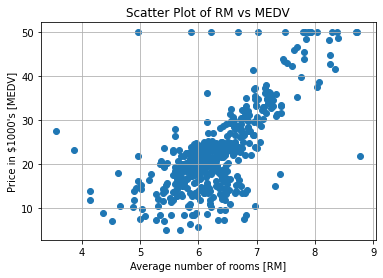

In [3]:
import matplotlib.pyplot as plt
%matplotlib inline
plt.scatter(boston_df["RM"], boston_df["MEDV"])

plt.title("Scatter Plot of RM vs MEDV")
plt.xlabel("Average number of rooms [RM]")
plt.ylabel("Price in $1000\'s [MEDV]")
plt.grid()

plt.show

Pandasのcorrメソッドで平均部屋数と住宅価格の相関係数を算出する

In [4]:
boston_df[["RM", "MEDV"]].corr()

,RM,MEDV
RM,1.00000,0.69536
MEDV,0.69536,1.00000


RMとMEDVの間には、相関係数が0.69536、つまり約0.7程度の正の相関があることが分かった

### 線形回帰モデルの構築

`fit` メソッドで重みを学習することで、線形回帰モデルを構築する。

In [6]:
from sklearn.linear_model import LinearRegression

lr = LinearRegression()

X = boston_df[["RM"]].values
Y = boston_df["MEDV"].values

lr.fit(X,Y)

LinearRegression()

学習で得られた、線形モデルの切片 `w0` は `intercept_` 属性に、説明変数の係数 `w1` は`coef_` 属性に格納される。実際に確認する。

In [7]:
print('coefficient = ', lr.coef_[0])
print('intercept = ', lr.intercept_)

coefficient =  9.10210898118031
intercept =  -34.67062077643857


学習で得られた切片と係数を利用して、回帰直線を引く。